# 2.3 - Overfitting and regularization

In [ ]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False); 

In [1]:
%matplotlib inline

## Overfitting

Overfitting is a phenomenon where a statistical or ML model "memorizes" the data in the training set, but it is not able to capture the underlying structure of the data, so it is unable to **generalize** correctly and performs bad predictions.

The oposite behavior to overfitting is **underfitting**, in this case the model cannot be adjusted to the training data, and produces bad predictions too. Neither, overfitting or underfitting is a desirable behavior. 

In order to identify if a model is suffering from overfitting, it is necessary that during validation phase both training and test performance measures are estimated.

None


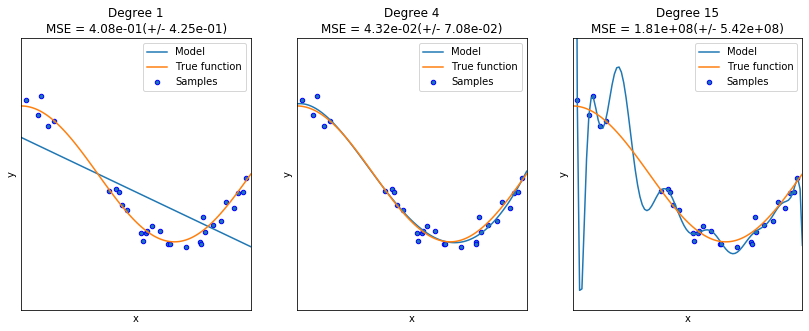

In [2]:
import sys
sys.path.insert(0, './local/lib/')
import regularization as reg
reg.PrintOverfittingReg()

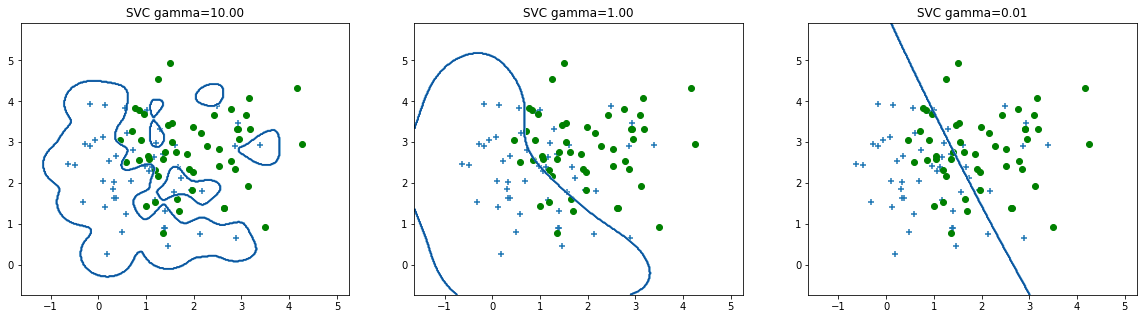

In [3]:
reg.PrintOverfittingClassify()

The causes of overfitting are mainly:

- Noisy data combined with a complex model (a model with a large number of parameters)

- A small data set with a large number of variables (the curse of dimensionality). 

In order to avoid overfitting, there are mainly two strategies that can be used, even conjointly. Eitherway, it is always important to perform a correct validation of the models, using three splits of the dataset: **training**, **validation (also called development)**, and **test**. The test set must be used only to estimate the error commited by the system, and never for training, model selection or hyperparameter tunning. In this way, we are going to estimate the real generalization capability of the models.


### Early stopping


This is a strategy to preven overfitting in parametric models, such as ANN, where the validation error is used as a stop criterion. If the validation error starts rising, no matter if the training error continues decreasing, the algorithm stops the training process. 

In keras, early stopping is implemented through a callback function. An instance of the class EarlyStopping must be passed to the fit method. 

In [ ]:
earlystopping = keras.callbacks.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

model.fit(...., callbacks=[earlystopping])

**patience** parameter gives the training algorithm a window of iteration to improve again the performance measure before it stop the training process.

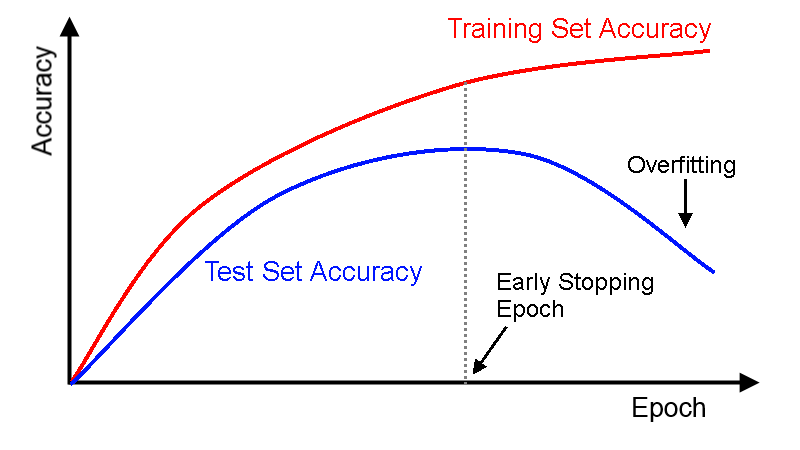

In [8]:
from IPython.display import Image
Image(filename='local/imgs/ParadaAnticipada.png')

## Regularization

In machine learning and inverse problems, regularization is the mathematical process of adding information in order to solve an ill-posed problem or to prevent overfitting. Regularization applies to objective functions in ill-posed optimization problems.

A mathematical problem or series of equations is ill-conditioned if a small change in the independent variable (input) leads to a large change in the dependent variable (output). This can lead to computational problems. For example, if a system of equations is ill-conditioned, the solution exists, but it is very difficult to find.

In the case of a polinomial regression, the overfitting leads to a magnitude increment of the polynomial's weights. Therefore, regularization can be implemented as a constriction term in the loss function:

$$E({\bf{w}}) = \frac{1}{2}\sum_{i=1}^{N}\left( y_i - f({\bf{x}}_i,{\bf{w}})\right) ^2 + \frac{\lambda}{2}\|{\bf{w}}\|^2$$


The larger $\lambda$, the higher the penalization due the complexity of the model.

Give a training set $\mathcal{D} = \{({\bf{x}}_i,y_i)\}_{i=1}^{N}$, being ${\bf{x}}_i$ the feature vector representing the sample $i$, and $y_i$ its corresponding target value,  the equation for weights update is given by:
$$w_j = w_j - \eta \left( \lambda w_j + \sum_{i=1}^{N} \left( f({\bf{x}}_i,{\bf{w}}) - y_i\right)x_{ij} \right)  $$

An analytical equivalent expression for the regularized multiple regression is given by:
$${\bf{w}} = \left( {\bf{X}}^T {\bf{X}} + \lambda {\bf{I}} \right)^{-1} {\bf{X}}^T {\bf{Y}}$$

For the logistic regression, the regularization can be derived straightforwardly:

$$w_j = w_j - \eta \left( \lambda w_j + \sum_{i=1}^{N} \left( g\left(f({\bf{x}}_i,{\bf{w}})\right) - y_i\right)x_{ij} \right)  $$

where $g(\cdot)$ is the logistic function

Lets see an example:

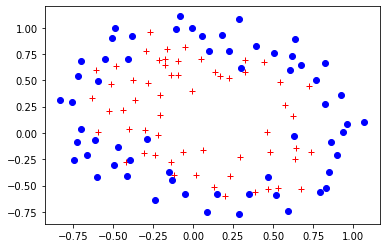

In [3]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
data = np.genfromtxt("local/data/ex2data2.txt",delimiter=",")
X = data[:, [0, 1]]; Y = data[:, 2];
plt.plot(X[Y.flat==1,0],X[Y.flat==1,1],'r+')
plt.plot(X[Y.flat==0,0],X[Y.flat==0,1],'bo')

The following is the boundary obtained for a polinomial of degree 6.

Error= 0.17924839740742132


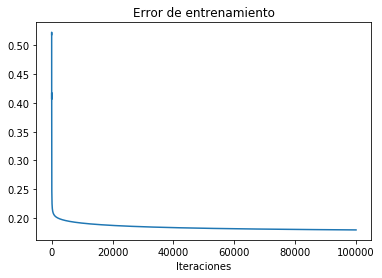

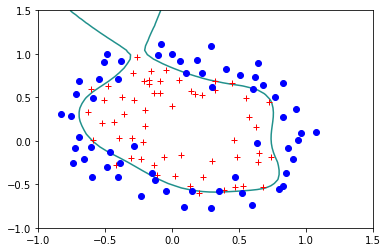

In [4]:
reg.StandardLogisticRegression(X,Y)

Lets try the regulirized version for $\lambda=0.1$:

Error= 0.2507583326384995


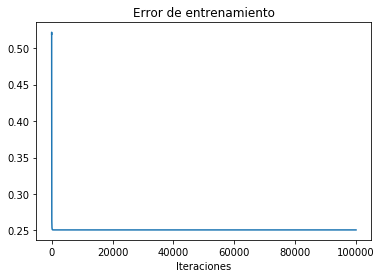

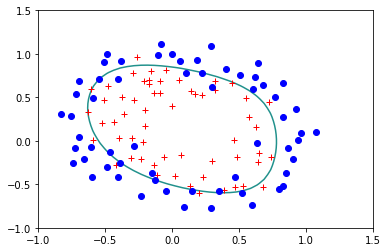

In [5]:
reg.StandardLogisticRegression(X,Y,lam=0.1)

Error= 0.33604518076771783


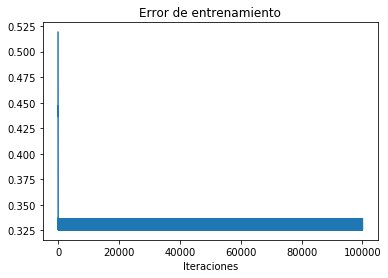

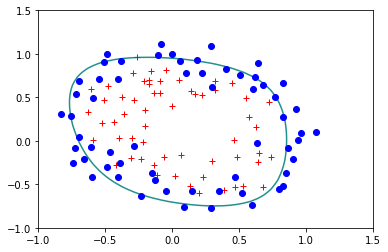

In [6]:
reg.StandardLogisticRegression(X,Y,lam=0.5)

('Error=', 0.39341073848662333)


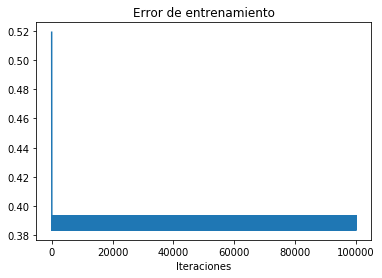

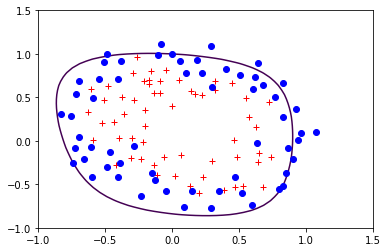

In [11]:
reg.StandardLogisticRegression(X,Y,lam=1)

The restriction term used in the former loss function corresponds to the $L_2$ norm of the vector $\bf{w}$. This technique is also called **ridge regression**. It is possible to use other norms, for instance, if the regularization term uses the $L_1$ norm, the technique is known as LASSO, which stands for Least Absolute Shrinkage and Selection Operator. The idea behind LASSO is the same that in the ridge regression, however, due to the $L_1$ norm, the magnitude of the weights is not only bounded but, some of the weights become 0.

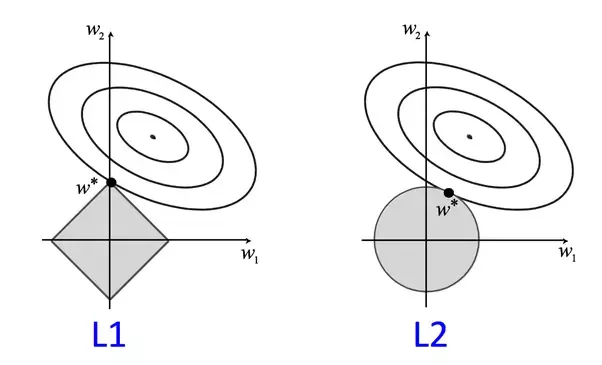

In [10]:
from IPython.display import Image
Image(filename='local/imgs/L1L2.png')

In [7]:
from sklearn import linear_model, datasets
diabetes=datasets.load_diabetes()
print(diabetes.data)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [8]:
clf=linear_model.Lasso(alpha=0.5)
clf.fit(diabetes.data,diabetes.target)
print(clf.coef_)

[  0.          -0.         471.03873321 136.50710814  -0.
  -0.         -58.3195488    0.         408.02332435   0.        ]


## The curse of dimensionality

As I pointed out before, the combination of a small dataset and a large number of variables, is one of the potential causes of overfitting. In this case, the better way to address such problem is by using dimensionality reduction techniques. The aim of those methods is to reduce the number of variables (the dimensionality of the feature space) and acordingly the complexity of the model. There are two approaches:

- Feature selection

- Feature extraction